# PROJECT 2 
## Video Game Sales
### By: Jordan Ledbetter

### Getting Started in Python
#### Importing Libraries
Packages provid a comprehensive set of tools for data visualization and data manipulation. Each of these packages contain various pre-written functions that can assist us in cleaning, reshaping, and visualizing our data.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Importing the Data
We will refer to our data set as vgSales. This dataset contains over 16,000 video games with variety in platform, genre, publisher, sales, and year released.

In [17]:
vgSales = pd.read_csv('vgsales.csv')

### Brief Overview
The vgSales.csv dataset is a collection of video game sales data spanning from 1980 to 2016. It contains information on the video game name, platform, year of release, genre, publisher, North American sales, European sales, Japanese sales, other sales, and global sales. The dataset was originally sourced from VGChartz and has been widely used in data analysis and visualization projects.

This dataset is useful for exploring trends and patterns in the video game industry, such as the rise of certain platforms or genres over time, the impact of global sales on the industry, and the distribution of sales across different regions. It can also be used to identify popular publishers and individual games, and to compare sales across different platforms and regions.

### Objective
The video game industry has seen exponential growth in recent years, with more than 2.7 billion gamers worldwide and an estimated industry value of $159.3 billion in 2020. With such a large and growing market, it is crucial for game developers and publishers to understand the factors that influence video game sales and consumer preferences.

The vgSales.csv dataset contains information on video game sales, including the game's title, platform, genre, publisher, release year, and sales figures in various regions of the world. By analyzing this dataset, we can gain insights into the most popular video games, platforms, and genres, as well as the impact of different variables on sales.

Our analysis will begin by exploring the most popular video games, platforms, and genres based on sales figures. We will also investigate the regional differences in video game sales to understand which games are most popular in different regions and the factors that contribute to these differences.

Next, we will analyze the impact of different variables on video game sales, such as the game's release year, publisher, and rating. By examining these variables, we can gain insights into what factors contribute to a game's success and make recommendations for game developers and publishers to optimize their game development and marketing efforts.

Finally, we will use predictive models to estimate future video game sales based on the insights gained from our analysis. By forecasting future sales, we can provide game developers and publishers with insights into market trends and consumer preferences to guide their future game development and marketing strategies.

Overall, the objective of this analysis is to provide insights and actionable recommendations to game developers and publishers based on an analysis of video game sales data. By understanding the most popular video games, platforms, and genres, regional sales differences, and the impact of different variables on sales, we aim to help game developers and publishers optimize their game development and marketing efforts to meet consumer preferences and maximize sales.

## Identifying trends in Video Game Sales

### Top 10 Most Popular Video Games


In [31]:
grouped = vgSales.groupby('Name').sum()[['Global_Sales']]
topVG = grouped.sort_values('Global_Sales', ascending=False).head(10)
print(topVG)

                                Global_Sales
Name                                        
Wii Sports                             82.74
Grand Theft Auto V                     55.92
Super Mario Bros.                      45.31
Tetris                                 35.84
Mario Kart Wii                         35.82
Wii Sports Resort                      33.00
Pokemon Red/Pokemon Blue               31.37
Call of Duty: Black Ops                31.03
Call of Duty: Modern Warfare 3         30.83
New Super Mario Bros.                  30.01


### Top 10 Most Popular Video Game Platforms

In [23]:
platform_count = vgSales.groupby('Platform')['Name'].count()
topPlatforms = platform_count.sort_values(ascending = False)[:10]
print(topPlatforms)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: Name, dtype: int64


### The Most Popular Video Game Genre

In [27]:
genre_count = vgSales.groupby('Genre')['Name'].count()
topGenres = genre_count.sort_values(ascending = False)[:10]
print(topGenres)

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Name: Name, dtype: int64


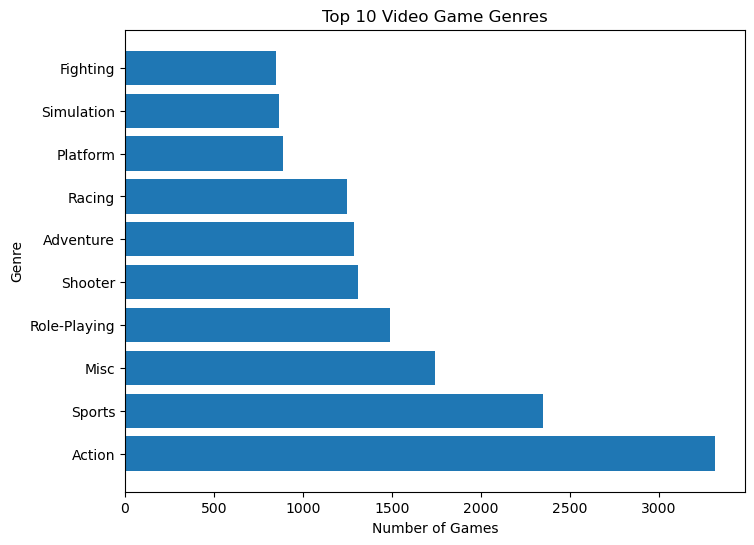

In [33]:
# count the number of games in each genre
genre_counts = vgSales['Genre'].value_counts().sort_values(ascending=False)

# Take the top 10 most popular genres
top_genres = genre_counts[:10]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_genres.index, top_genres.values, align='center')
ax.set_xlabel('Number of Games')
ax.set_ylabel('Genre')
ax.set_title('Top 10 Video Game Genres')
plt.show()

## Analyzing Regional Sales Differences

In [70]:
# group by genre and sum the sales for each region
region_sales = vgSales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

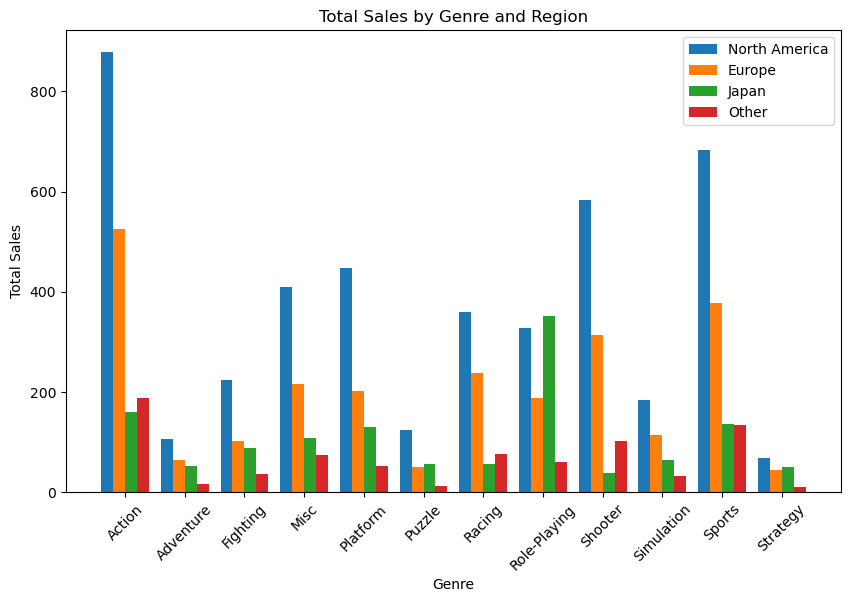

In [71]:
# create a bar plot
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(len(region_sales.index))
width = 0.2
ax.bar(x, region_sales['NA_Sales'], width, label='North America')
ax.bar(x+width, region_sales['EU_Sales'], width, label='Europe')
ax.bar(x+2*width, region_sales['JP_Sales'], width, label='Japan')
ax.bar(x+3*width, region_sales['Other_Sales'], width, label='Other')
ax.set_xticks(x+1.5*width)
ax.set_xticklabels(region_sales.index, rotation=45)
ax.set_xlabel('Genre')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Genre and Region')
ax.legend()
plt.show()

In [72]:
# group by publisher and sum the sales for each region
publisher_sales_by_region = vgSales.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# sort by top five publishers based on total sales across all regions
top_five_publishers = publisher_sales_by_region.sum(axis=1).sort_values(ascending=False)[:5].index.tolist()
publisher_sales_by_region = publisher_sales_by_region.loc[top_five_publishers]

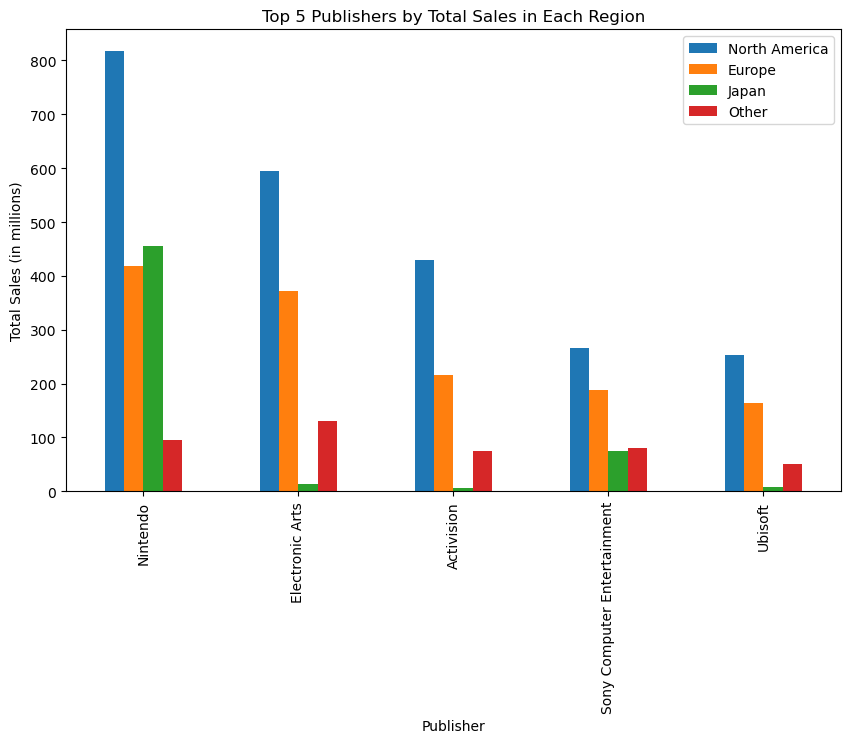

In [73]:
# sort by top five publishers based on total sales across all regions
top_five_publishers = publisher_sales_by_region.sum(axis=1).sort_values(ascending=False)[:5].index.tolist()
publisher_sales_by_region = publisher_sales_by_region.loc[top_five_publishers]

# create the barplot
ax = publisher_sales_by_region.plot(kind='bar', figsize=(10,6))

# set the title and axes labels
ax.set_title('Top 5 Publishers by Total Sales in Each Region')
ax.set_xlabel('Publisher')
ax.set_ylabel('Total Sales (in millions)')

# change the legend labels
ax.legend(['North America', 'Europe', 'Japan', 'Other'], loc='upper right')

## The Impact on Sales
There are a variety of variables that could potentially impact sales, such as year of release, genre, and publisher. By analyzing the data, we could explore the impact of these variables on sales and identify trends and patterns.

### Release Year

By analyzing global sales over the years, we can provide insights into how the industry has evolved over time, which platforms and genres have been most successful, and how sales have been affected by technological advancements or changes in consumer preferences.

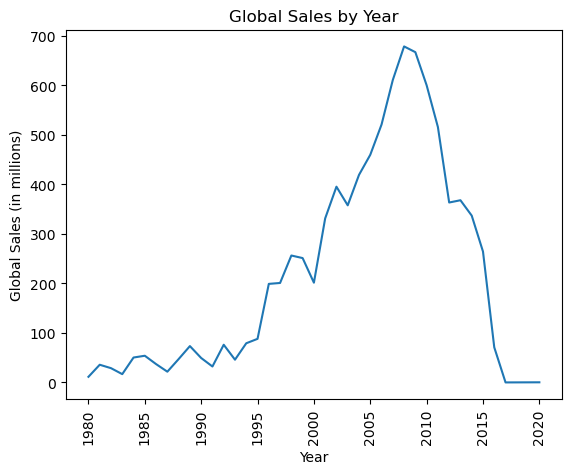

In [82]:
# group by year and sum the sales
yearly_sales = vgSales.groupby('Year')['Global_Sales'].sum()

# create a line plot with x-axis as year and y-axis as global sales
plt.plot(yearly_sales.index, yearly_sales)

# set x-axis label
plt.xlabel('Year')

# set y-axis label
plt.ylabel('Global Sales (in millions)')

# set plot title
plt.title('Global Sales by Year')

# rotate x-axis labels vertically
plt.xticks(rotation=90)

# show the plot
plt.show()

The plot shows the relationship between global video game sales and the year of release for each game. The graph indicates that the video game industry has grown significantly over the years, with sales steadily increasing from the 1980s to the early 2000s. After reaching a peak around 2008-2009, sales have declined somewhat but remain at a relatively high level. The visible growth shows a positive correlation between year and sales, indicating that video games released in more recent years tend to have higher sales than those released in earlier years. Overall, the graph suggests that the video game industry has been a growing and dynamic market over the past few decades.

### Genre

Analyzing the relationship between global sales by genre can be beneficial in several ways. Firstly, it can help game developers and publishers understand which genres are the most popular and have the highest potential for success. This information can be used to guide decisions regarding game development and marketing strategies. Secondly, it can provide insights into consumer preferences and trends, which can be useful in identifying new opportunities and staying competitive in the market. Finally, it can also help investors make informed decisions about which game companies to invest in based on the performance of specific genres in the market.

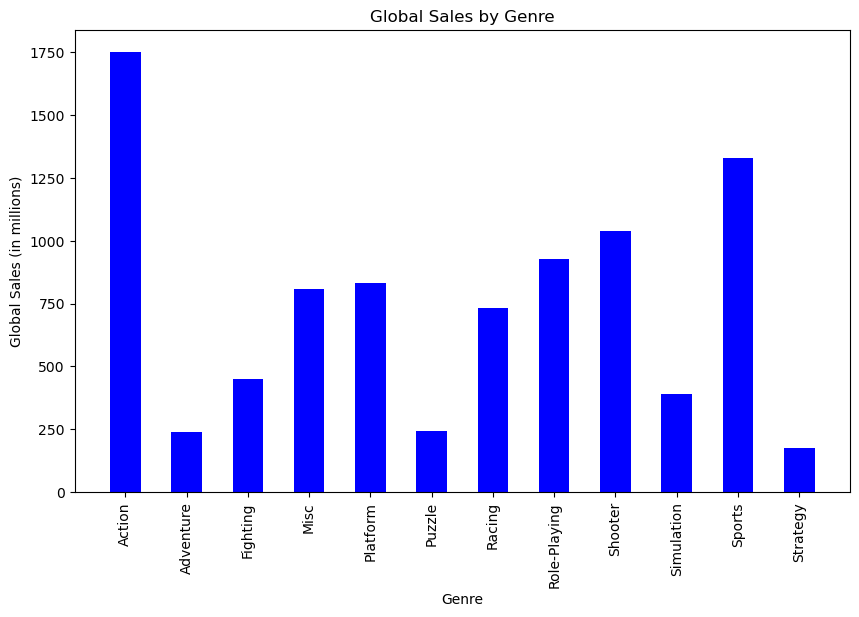

In [79]:
# group the sales by genre and calculate the total sales
genre_sales = vgSales.groupby('Genre')['Global_Sales'].sum()

# create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(genre_sales.index, genre_sales.values, width=0.5, color='blue')

# set the chart title and labels
ax.set_title('Global Sales by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Global Sales (in millions)')

# rotate x-axis labels vertically
plt.xticks(rotation=90)

# display the plot
plt.show()

The bar chart shows that the Action genre has the highest sales, followed by Sports, Shooter, and Role-Playing. The graph suggests that consumers tend to purchase more games from the Action genre, making it the most profitable genre in the gaming industry. Analyzing the sales by genre can help game developers and publishers determine which genre to focus on and invest in.

### Publisher

Analyzing global sales by publisher is important because it provides insights into which publishers have been most successful in terms of sales over time. This information can be useful for industry professionals, as it can help them identify trends and patterns in the market and make strategic decisions about which publishers to work with or compete against. Additionally, it can provide useful information to investors and stakeholders who are interested in understanding the financial performance of different publishers.

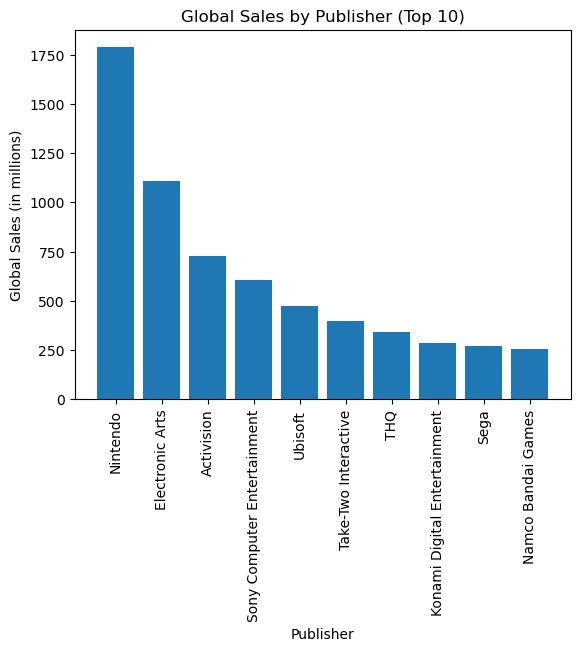

In [83]:
# group by publisher and sum the sales
publisher_sales = vgSales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10]

# create a bar plot with x-axis as publisher and y-axis as global sales
plt.bar(publisher_sales.index, publisher_sales)

# set x-axis label
plt.xlabel('Publisher')

# set y-axis label
plt.ylabel('Global Sales (in millions)')

# set plot title
plt.title('Global Sales by Publisher (Top 10)')

# rotate x-axis labels vertically
plt.xticks(rotation=90)

# show the plot
plt.show()

This graph produces a bar plot showing the top 10 publishers in terms of global sales. The x-axis displays the publishers and the y-axis displays the global sales in millions. The height of each bar represents the total global sales of each publisher. This graph is useful for identifying the major players in the video game industry and understanding the distribution of sales among them.

## Predicting Future Sales

Predicting future sales is necessary for businesses to plan and make informed decisions. It allows them to estimate demand, optimize inventory and production, allocate resources, and develop marketing strategies. By understanding future sales trends, businesses can adjust their operations and offerings accordingly to maximize profits and minimize risks. Additionally, accurate sales predictions can help businesses secure financing and investments.

### Global Sales Over the Years by Publisher

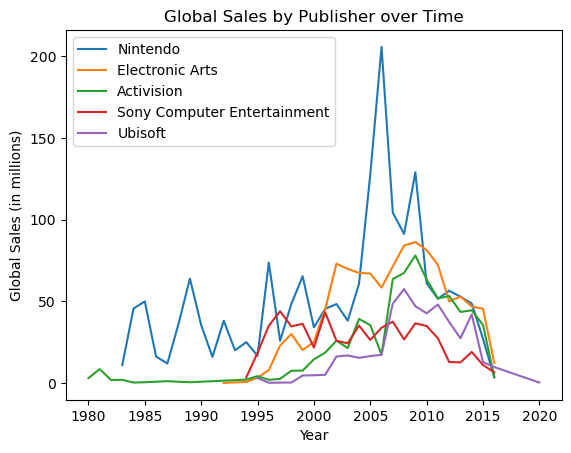

In [84]:
# group by publisher and year, and sum the global sales
publisher_yearly_sales = vgSales.groupby(['Publisher', 'Year'])['Global_Sales'].sum()

# choose the top 5 publishers based on total global sales
top_publishers = vgSales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5).index.tolist()

# create a line graph for each publisher's global sales over time
for publisher in top_publishers:
    publisher_sales = publisher_yearly_sales.loc[publisher]
    plt.plot(publisher_sales.index, publisher_sales, label=publisher)

# set x-axis label
plt.xlabel('Year')

# set y-axis label
plt.ylabel('Global Sales (in millions)')

# set plot title
plt.title('Global Sales by Publisher over Time')

# add legend
plt.legend()

# show the plot
plt.show()

The graph of global sales by publisher shows the total global sales of video games published by each of the top publishers from 1980 to 2020. The graph highlights the growth and decline of different publishers over time, allowing for comparisons and insights into their success in the video game industry. It also helps identify key players in the market and their market share over the years. Overall, the graph provides a visual representation of the global sales by publisher, which can be helpful for making strategic decisions and identifying potential partnerships within the video game industry.

### Global Sales Over the Years by Genre

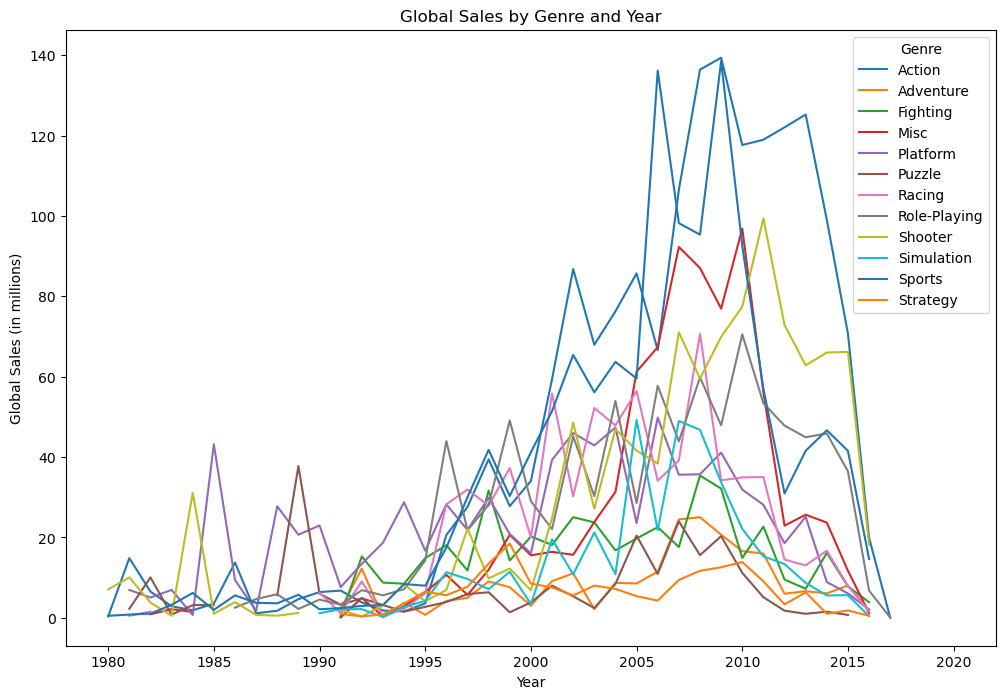

In [86]:
# group by year and genre and sum the sales
yearly_genre_sales = vgSales.groupby(['Year', 'Genre'])['Global_Sales'].sum()

# pivot the table to make each genre a separate column
yearly_genre_sales = yearly_genre_sales.unstack(level=1)

# create a line plot with x-axis as year and y-axis as global sales
yearly_genre_sales.plot(kind='line', figsize=(12,8))

# set x-axis label
plt.xlabel('Year')

# set y-axis label
plt.ylabel('Global Sales (in millions)')

# set plot title
plt.title('Global Sales by Genre and Year')

# show the plot
plt.show()

Analyzing the global sales over the years by genre is important because it helps us understand the popularity and trends of different genres in the gaming industry. This information can be used by game developers, publishers, and marketers to make informed decisions about the types of games they should invest in, market and promote. It can also help in identifying emerging trends and changes in consumer preferences over time, which can inform future game development strategies. Additionally, this analysis can provide insights into the potential success of new game releases based on historical data.